## Introduction
Ce notebook présente une manière ludique d'aborder la question de la *précision* dans représentation du spectre d'un signal à l'aide de la TFD (Transformée de Fourier Discrète).
Le problème posé est de retrouver, avec le plus de décimales possibles, le nombre $\pi$, en mesurant la fréquence d'un sinus pur égale à $f_0=\pi$ Hz. Ce sinus pur est de la forme $x_a(t)=\cos(2\pi f_0 t)$ échantillonné à la fréquence $F_e = 100$ Hz pendant 1s. Cela fournit le signal $x(n)=x_a(nT_e)$ avec $n=0,1,\ldots,99$.

#### mots clefs : 
TFD, précision

#### prérequis
* vidéo sur la TFD et la TFtd
* notebook "Changement de représentation"

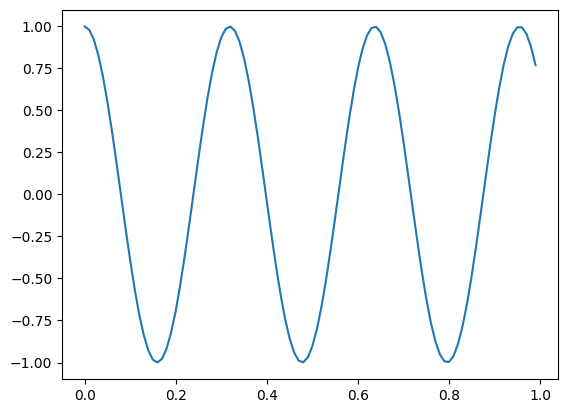

In [22]:
%matplotlib inline
import numpy as np
from numpy.fft import *
from numpy.random import *
import matplotlib.pyplot as plt

pi = np.pi # la variable pi est prédéfinie dans numpy
i = 1j

# génération du signal
Fe = 100.
f0 = pi
Tec=1
t = np.arange(0,Tec,1/Tec/Fe)

x = np.cos(2*pi*f0*t)

plt.plot(t,x)
plt.show()

## Estimation de la fréquence avec le max de la TFD

Ici nous allons chercher à estimer la fréquence en prenant l'index du maximum de la TFD, notée :
$$X(k)=\sum_{k=0}^{N-1} x(n) e^{-i2\pi\frac{kn}{N}}.$$
Completez le script précédent pour :
1. Calculer la TFD du signal à l'aide de la fonction `fft` (importée du module `np.fft.fft`)
2. Rechercher l'index du maximum à l'aide de la fonction `np.argmax`
3. Convertir ce résultat en fréquence estimée $\hat{f_0}$ et calculer la valeur de $\pi$ estimée par $\hat{\pi}=\hat{f_0}$

Que constatez-vous ? Comment peut-on calculer *à priori* une borne de l'erreur commise dans l'estimation ?

47


C:\Users\Titouan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\Titouan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


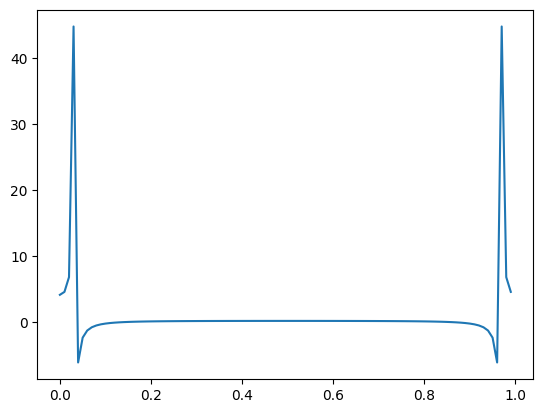

pi estimé : 47.0
borne de l'erreur :  1.0  Hz


In [27]:
x_fft=np.fft.fft(x)
index=np.argmax(np.abs(x_fft[len(x_fft)//2:]))
print(index)
pi_est=index/Tec

plt.plot(t,x_fft)
plt.show()
print('pi estimé :',pi_est) # pi_est est le pi chapeau du texte
print('borne de l\'erreur : ',1/Tec,' Hz') # remplacer le 0 par la valeur idoine

## Amélioration de la précision

Comment peut-on obtenir une meilleure précision de la représentation ?
Ecrire une fonction python `piest(x,p,Fe)` qui retourne la valeur de $\pi$ estimée à la précision minimale de $\pm 10^{-p}$. Tester votre fonction avec $p=1$.

In [7]:
def piest(x,p,Fe):
    x_fft=np.fft.fft(x)
    index=np.argmax(np.abs(x_fft))
    N=Fe*(10**p)
    return index*Fe/N

print(piest(x,1,Fe))

0.314


## Une mystérieuse erreur

Essayez maintenant avec $p=3$. Que constatez vous ? Affichez la valeur de $M$ (ordre de la TFD) pour se rendre compte qu'il ne faut pas trop exagérer sur la précision demandée, sous peine de ne pas voir le code s'arrêter avant 2050.

Pour mieux comprendre cette erreur, voici deux modifications intéressantes, à faire indépendemment :
1. Utilisez un fenêtrage du signal : on calcule la TFD de $x(n)w(n)$ où $w(n)$ est une *fenêtre* usuelle, comme par exemple la fenêtre de Hann (`np.hanning`)
2. Sans fenêtrage, faire le test en utilisant comme signal $x_a(t)=\exp(i2\pi f_0 t)$

Reste à interpréter ces incroyables résultats !

In [1]:
# votre code ici
# vous pouvez par exemple présenter vos résultats avec :
# print(pi_est,'+/-',precision) 


